# Happiness Inside a Job and Employee Churnover

Employee turnover refers to the percentage of workers who leave an organization and are replaced by new employees. It is very costly for organizations, where costs include but not limited to: separation, vacancy, recruitment, training and replacement. On average, organizations invest between four weeks and three months training new employees. This investment would be a loss for the company if the new employee decided to leave the first year

# Happy Force and IBM Employee Simualted Data

During these examples we will be dealing with a database provided by [IBM](https://www.ibm.com/communities/analytics/watson-analytics-blog/hr-employee-attrition/). It contains employee data to help uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists!


# IBM Data
<h3>Notes on DataFrame</h3>

- Age - Numerical
- Attrition - Employee leaving the company (0=no, 1=yes)
- Business Travel	- (1=No Travel, 2=Travel Frequently, 3=Tavel Rarely)
- Department - (1=HR, 2=R&D, 3=Sales)
- Distance From Home - Numerical Value
- Education -	Numerical Value
- Education Field - 	(1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TECHNICAL)
- EMPLOYEE COUNT	Numerical Value
- EMPLOYEE NUMBER	Numerical Value - EMPLOYEE ID
- ENVIROMENT SATISFACTION	Numerical Value - SATISFACTION WITH THE ENVIROMENT
- GENDER	(1=FEMALE, 2=MALE)
- HOURLY RATE	Numerical Value - HOURLY SALARY
- JOB INVOLVEMENT	Numerical Value - JOB INVOLVEMENT
- JOB LEVEL	Numerical Value - LEVEL OF JOB
- JOB ROLE	(1=HC REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= REASEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIEVE, 9= SALES REPRESENTATIVE)
- JOB SATISFACTION	Numerical Value - SATISFACTION WITH THE JOB
- MARITAL STATUS	(1=DIVORCED, 2=MARRIED, 3=SINGLE)
- MONTHLY INCOME	Numerical Value - MONTHLY SALARY
- MONTHY RATE	Numerical Value - MONTHY RATE
- NUMCOMPANIES WORKED	Numerical Value - NO. OF COMPANIES WORKED AT
- OVER 18	(1=YES, 2=NO)
- OVERTIME	(1=NO, 2=YES)
- PERCENT SALARY HIKE	Numerical Value - PERCENTAGE INCREASE IN SALARY.
- The parentage of change in salary between 2 year (2017, 2018).
- PERFORMANCE RATING	Numerical Value - ERFORMANCE RATING
- RELATIONS SATISFACTION	Numerical Value - RELATIONS SATISFACTION
- STANDARD HOURS	Numerical Value - STANDARD HOURS
- STOCK OPTIONS LEVEL	Numerical Value - STOCK OPTIONS.
- TOTAL WORKING YEARS	Numerical Value - TOTAL YEARS WORKED
- TRAINING TIMES LAST YEAR	Numerical Value - HOURS SPENT TRAINING
- WORK LIFE BALANCE	Numerical Value - TIME SPENT BEWTWEEN WORK AND OUTSIDE
- YEARS AT COMPANY	Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPNAY
- YEARS IN CURRENT ROLE	Numerical Value -YEARS IN CURRENT ROLE
- YEARS SINCE LAST PROMOTION	Numerical Value - LAST PROMOTION
- YEARS WITH CURRENT MANAGER	Numerical Value - YEARS SPENT WITH CURRENT MANAGER

In [42]:
#Import required pacakages
#Imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

#Matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

# make prettier plots
%config InlineBackend.figure_format = 'svg' 

#Numpy
import numpy as np

#Pandas
import pandas as pd
import pandas_profiling

#Seaborn
import seaborn as sns
sns.set()

#Sklearn
from sklearn import preprocessing
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.metrics import median_absolute_error
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import (RandomForestClassifier,
                              RandomForestClassifier,
                              RandomForestRegressor,
                              GradientBoostingClassifier, 
                              ExtraTreesClassifier, #For each feature split rule is random, not optimal
                              VotingClassifier, 
                              AdaBoostClassifier, 
                              BaggingRegressor)

from sklearn.model_selection import (cross_val_score,
                                     GridSearchCV,
                                     RandomizedSearchCV,
                                     learning_curve,
                                     validation_curve,
                                     train_test_split,
                                     cross_validate)
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import make_classification

#XGBoost
from xgboost import XGBClassifier

import pickle

from sklearn.feature_selection import VarianceThreshold

In [93]:
ibm_data = pd.read_csv('./data/ibm.csv')

In [4]:
#Function to preprocess data
def preprocess_label_encoding(df):
    
    #Standardize column names
    df.columns = df.columns.str.strip()
    
    #drop duplicate data
    df = df.drop_duplicates()
    
    #Modify attrition value to 0 or 1 instead of Yes or No
    attrition_map = {"No": 0, "Yes": 1}
    df["Attrition"] = df["Attrition"].map(attrition_map)
    
    #Modify travel value to 0,1,2 instead of no travel, rarley travel, frequentyl travel
    travel_map = {"Non-Travel": 0, "Travel_Rarely": 1, "Travel_Frequently":2}
    df["BusinessTravel"] = df["BusinessTravel"].map(travel_map)
    
    #Drop DailyRate, Hourly Rate, Monthly Rate  (Have Monthly Income)
    df.drop(['DailyRate', 'MonthlyRate', 'HourlyRate','EmployeeCount','EmployeeNumber','Over18',\
            'StandardHours', 'Education',], axis=1, inplace=True)

    #One hot encode departments and drop first column to avoid linear dependency where some learning algorithms may struggle
    df = pd.get_dummies(df, columns=["Department"], drop_first=True)
    
    #Modify Education Field to 1,2,3,4,5,6 instead of HR,LIFE SCIENCES, MARKETING, MEDICAL SCIENCES, OTHERS, TECHNICAL
    education_map = {"Human Resources": 1, "Life Sciences": 2, "Marketing": 3, \
                     "Medical": 4, "Other": 5, "Technical Degree":6}    
    df["EducationField"] = df["EducationField"].map(education_map)
    df["EducationField"] = df["EducationField"].astype(int)

    #Modify Gender Field to 1,2 instead of Male, Female
    gender_map = {"Male": 1, "Female": 2}
    df["Gender"] = df["Gender"].map(gender_map)
    
    #Modify Job Involvement
    job_involvement_map = {"Sales Executive": 1, "Research Scientist": 2, "Laboratory Technician": 3, \
                           "Manufacturing Director": 4, "Healthcare Representative": 5, "Manager": 6, \
                           "Sales Representative": 7, "Research Director": 8, "Human Resources": 9}
    df["JobRole"] = df["JobRole"].map(job_involvement_map)
    
    #Modify Marital Status
    martial_map = {"Divorced": 1, "Single": 2, "Married": 3}
    df["MaritalStatus"] = df["MaritalStatus"].map(martial_map)   
    
    #Modify Overtime value to 0 or 1 instead of No or Yes
    overtime_map = {"No": 0, "Yes": 1}
    df["OverTime"] = df["OverTime"].map(overtime_map)
    
    #Reset Dataframe Index
    df = df.reset_index(drop=True)
    
    #TODO 
    #Figure Out a Way to Make Sense of: 
    #Education Column
    #Per profiler, Monthly Income is Highly Correlate with Job Level, how should this be handeled
    
    return df

In [94]:
#Function to preprocess data
def preprocess(df):
    
    #Standardize column names
    df.columns = df.columns.str.strip()
    
    #drop duplicate data
    df = df.drop_duplicates()
    
    #Modify attrition value to 0 or 1 instead of Yes or No
    attrition_map = {"No": 0, "Yes": 1}
    df["Attrition"] = df["Attrition"].map(attrition_map)
        
    #Drop DailyRate, Hourly Rate, Monthly Rate  (Have Monthly Income)
    df.drop(['DailyRate', 'MonthlyRate', 'HourlyRate','EmployeeCount','EmployeeNumber','Over18',\
            'StandardHours', 'Education',], axis=1, inplace=True)
    
    #One hot encode Travel and drop first column to avoid linear dependency
    df = pd.get_dummies(df, columns=["BusinessTravel"], drop_first=True)
    
    #One hot encode Departments and drop first column to avoid linear dependency 
    df = pd.get_dummies(df, columns=["Department"], drop_first=True)
    
    #One hot encode Education Field and drop first column to avoid linear dependency 
    df = pd.get_dummies(df, columns=["EducationField"], drop_first=True)
    
    ##One hot encode Gender Field and drop first column to avoid linear dependency
    df = pd.get_dummies(df, columns=["Gender"], drop_first=True)
    
    #One hot encode Job Involvement and drop first column to avoid linear dependency
    df = pd.get_dummies(df, columns=["JobRole"], drop_first=True)
    
    #One hot encode Marital Status and drop first column to avoid linear dependency
    df = pd.get_dummies(df, columns=["MaritalStatus"], drop_first=True)
    
    #Modify Overtime value to 0 or 1 instead of No or Yes
    overtime_map = {"No": 0, "Yes": 1}
    df["OverTime"] = df["OverTime"].map(overtime_map)
    
    #Reset Dataframe Index
    df = df.reset_index(drop=True)
        
    return df

In [95]:
ibm_df_label_encoded = preprocess_label_encoding(ibm_data)

In [96]:
ibm_df = preprocess(ibm_data)

In [7]:
pandas_profiling.ProfileReport(ibm_df)

Number of variables,41
Number of observations,1470
Total Missing (%),0.0%
Total size in memory,270.0 KiB
Average record size in memory,188.1 B
Numeric,17
Categorical,0
Boolean,23
Date,0
Text (Unique),0
Rejected,1


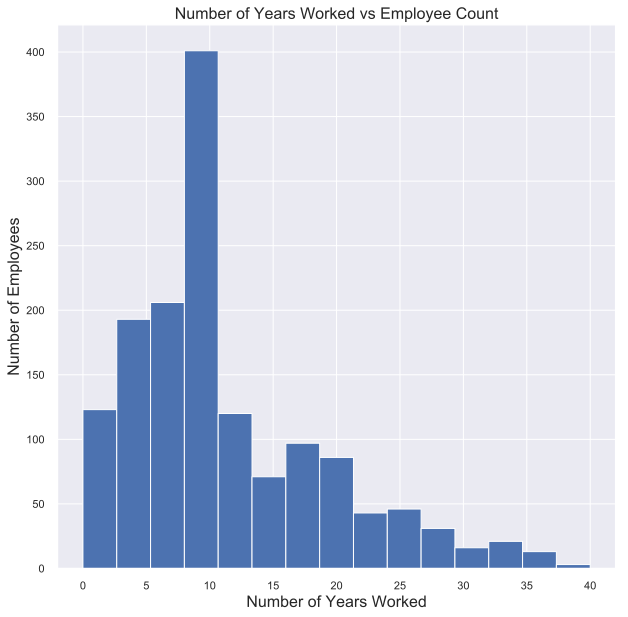

In [98]:
ax = ibm_df['TotalWorkingYears'].hist(bins=15);
ax.set_xlabel("Number of Years Worked", fontsize=16);
ax.set_ylabel("Number of Employees", fontsize=16);
ax.set_title("Number of Years Worked vs Employee Count", fontsize=16);
plt.savefig('./graphs/years_worked_pre.png')

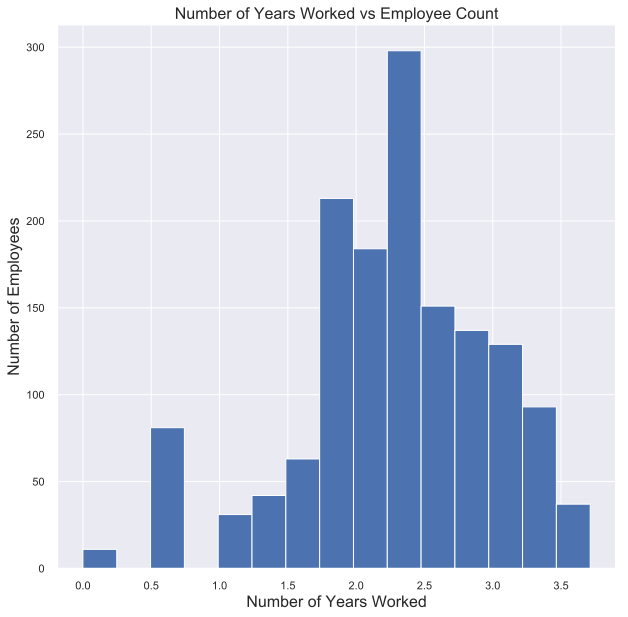

In [99]:
#Normalize Number of Years Worked
data_years_worked = np.log(ibm_df['TotalWorkingYears']+1)
ax = data_years_worked.hist(bins=15);
ax.set_xlabel("Number of Years Worked", fontsize=16);
ax.set_ylabel("Number of Employees", fontsize=16);
ax.set_title("Number of Years Worked vs Employee Count", fontsize=16);
plt.savefig('./graphs/years_worked_post.png')

In [10]:
#Normalize Number of Years Worked
ibm_df['TotalWorkingYears']= np.log(ibm_df['TotalWorkingYears']+1)

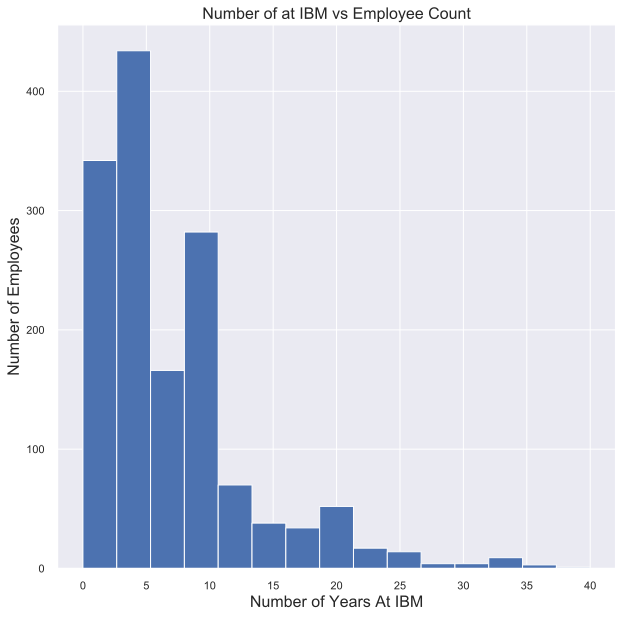

In [100]:
ax = ibm_df['YearsAtCompany'].hist(bins=15);
ax.set_xlabel("Number of Years At IBM", fontsize=16);
ax.set_ylabel("Number of Employees", fontsize=16);
ax.set_title("Number of at IBM vs Employee Count", fontsize=16);
plt.savefig('./graphs/years_worked_ibm_pre.png')

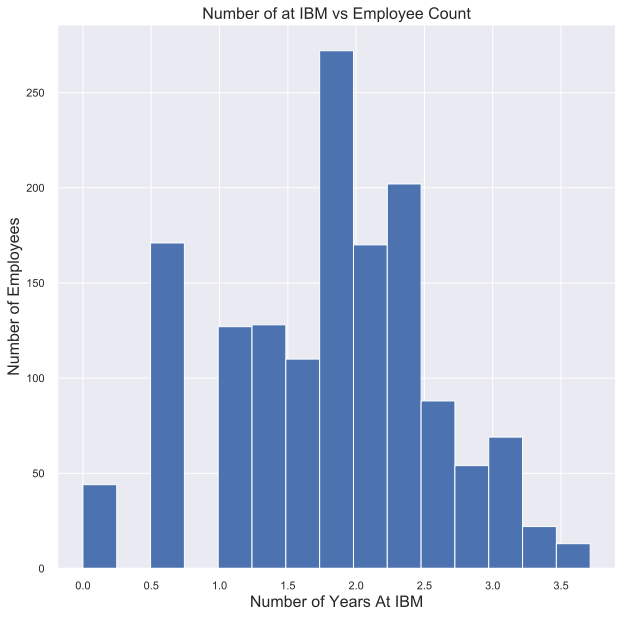

In [101]:
#Normalize Number of Years at Company
data_years_worked = np.log(ibm_df['YearsAtCompany']+1)
ax = data_years_worked.hist(bins=15);
ax.set_xlabel("Number of Years At IBM", fontsize=16);
ax.set_ylabel("Number of Employees", fontsize=16);
ax.set_title("Number of at IBM vs Employee Count", fontsize=16);
plt.savefig('./graphs/years_worked_ibm_post.png')

In [102]:
#Normalize Number of Years Worked
ibm_df['YearsAtCompany']= np.log(ibm_df['YearsAtCompany']+1)

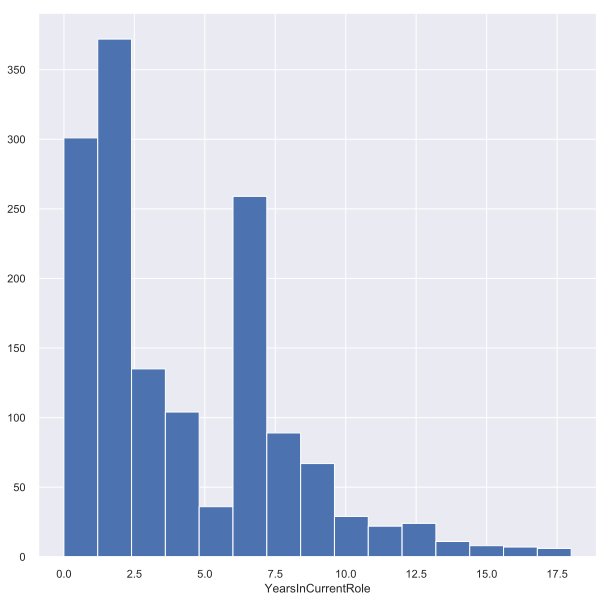

In [103]:
ax = ibm_df['YearsInCurrentRole'].hist(bins=15);
ax.set_xlabel("YearsInCurrentRole");

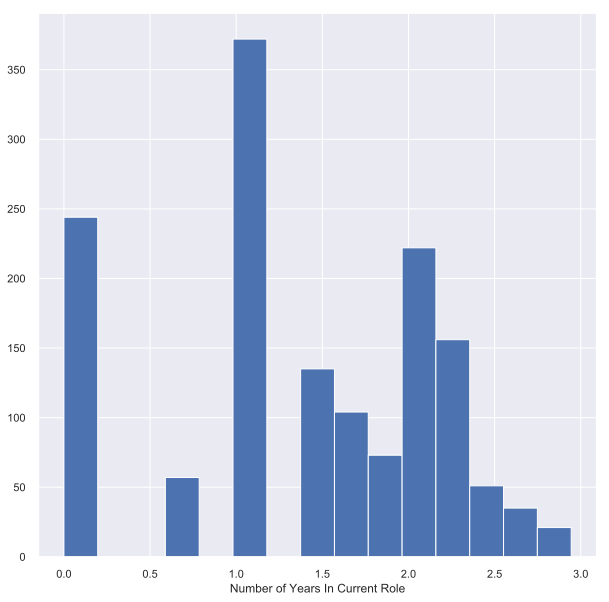

In [104]:
#Normalize Number of Years In Current Role
data_years_worked = np.log(ibm_df['YearsInCurrentRole']+1)
ax = data_years_worked.hist(bins=15);
ax.set_xlabel("Number of Years In Current Role");

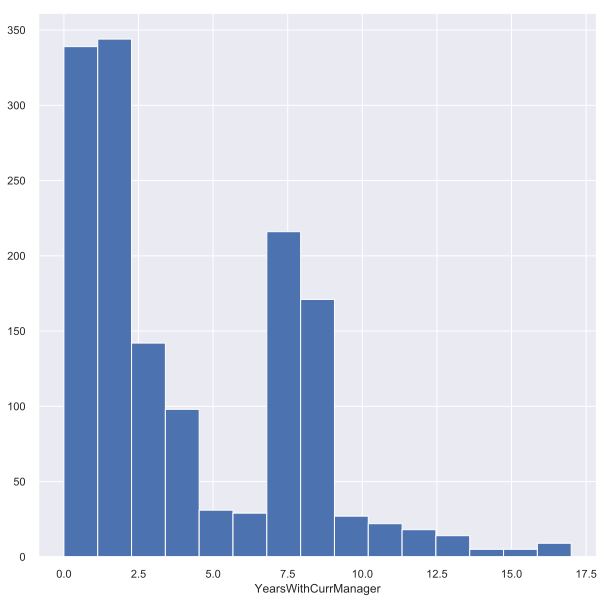

In [105]:
ax = ibm_df['YearsWithCurrManager'].hist(bins=15);
ax.set_xlabel("YearsWithCurrManager");


In [17]:
#with open('./data/ibm_df_label_encoded.pickle', 'wb') as f:
#    pickle.dump(ibm_df_label_encoded,f)

In [19]:
with open('./data/ibm_df.pickle', 'wb') as f:
    pickle.dump(ibm_df,f)

# Check Balance of Classes
- Look at proportion of classes to see if we're dealing with balanced or imbalanced data, since each one has its own set of tools to be used when fitting classifiers

# Get number of Yes/No Attritions

Left Company Samples = 237
Remained At Company Samples = 1233
Proportion of Remained to Left Samples = 19.22%


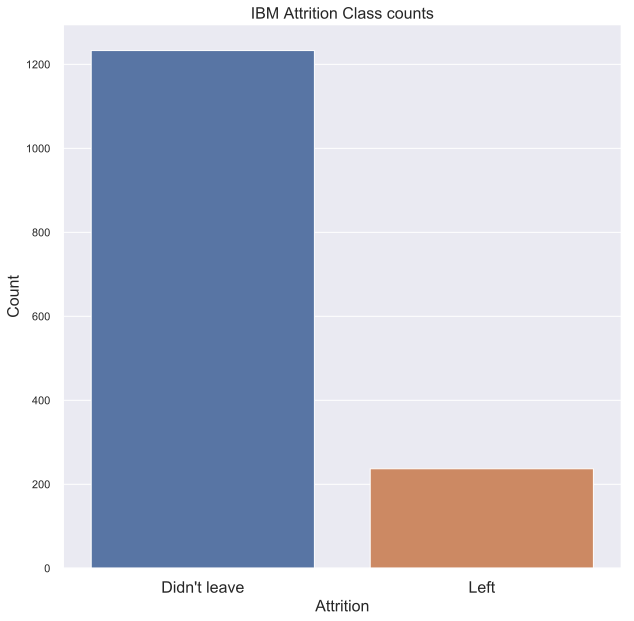

In [87]:
pos = ibm_df[ibm_df["Attrition"] == 1].shape[0]
neg = ibm_df[ibm_df["Attrition"] == 0].shape[0]
print("Left Company Samples = {}".format(pos))
print("Remained At Company Samples = {}".format(neg))
print("Proportion of Remained to Left Samples = {:.2f}%".format((pos / neg) * 100))
sns.countplot(ibm_df["Attrition"])
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 600
plt.xticks((0, 1), ["Didn't leave", "Left"], fontsize=16)
plt.xlabel("Attrition", fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.title("IBM Attrition Class counts",fontsize=16);
plt.savefig('./graphs/class_counts.png')

<h3> We have an imbalanced dataset.</h3> 
As a result, when we fit classifiers on such datasets, we should use metrics other than accuracy when comparing models such as:

- F1 Score
- AUC (Area under ROC Curve)

Moreover, class imbalance influences a learning algorithm during training by making the decision rule biased towards the majority class by implicitly learning a model that optimized the predictions based on the majority class in the dataset. There are three ways to deal with this issue.

- Assign a larger penalty to wrong predictions from the minority class
- Upsampling the minority class or downsampling the majority class
- Generate synthetic training examples

Steps to Address This

First:
- split the data into training and test sets using 80/20 split; 80% of the data will be used to train the models and 20% to test the performance of the models. 
Second: 
- Upsample the minority class and downsample the majority class. For this data set, positive class is the minority class and negative class is the majority class.

In [22]:
X = ibm_df.loc[:, ibm_df.columns != "Attrition"].values
y = ibm_df.loc[:, ibm_df.columns == "Attrition"].values.flatten()

In [23]:
#Split the data 80 - 20  train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, random_state=1)

In [24]:
with open('./data/split_data/X_train.pickle', 'wb') as f:
    pickle.dump(X_train,f)
with open('./data/split_data/y_train.pickle', 'wb') as f:
    pickle.dump(y_train,f)
with open('./data/split_data/X_test.pickle', 'wb') as f:
    pickle.dump(X_test,f)
with open('./data/split_data/y_test.pickle', 'wb') as f:
    pickle.dump(y_test,f)

Notes: 

Stratified sampling aims at splitting one data set so that each split are similar with respect to something.

In a classification setting, it is often chosen to ensure that the train and test sets have approximately the 
same percentage of samples of each target class as the complete set.

As a result, if the data set has a large amount of each class, stratified sampling is pretty much the same as 
random sampling. But if one class isn't much represented in the data set, which may be the case in your dataset 
since you plan to oversample the minority class, then stratified sampling may yield a different target class 
distribution in the train and test sets than what random sampling may yield.

In [25]:
# Now add some random oversampling of the minority classes using imblearn
ros = RandomOverSampler(random_state=0)
X_resampled_up, y_resampled_up = ros.fit_sample(X_train,y_train)

In [26]:
with open('./data/split_data/X_resampled_up.pickle', 'wb') as f:
    pickle.dump(X_resampled_up,f)
with open('./data/split_data/y_resampled_up.pickle', 'wb') as f:
    pickle.dump(y_resampled_up,f)


We always oversample after splitting into training and validation datasets inorder to prevent bleed information from the
validation set into the training of the model. If I upsample a dataset before splitting it into a train and validation set, 
I could end up with the same ovbservation in both datasets. As a result a complex enough model will be able to perfectly predict
the value for those observations when predicting on the validation set, inflating the accuracy and recall. 


In [106]:
#Smote Random Oversampling
X_smoted, y_smoted = SMOTE(random_state=42).fit_sample(X_train,y_train)

In [107]:
with open('./data/split_data/X_smoted.pickle', 'wb') as f:
    pickle.dump(X_smoted,f)
with open('./data/split_data/y_smoted.pickle', 'wb') as f:
    pickle.dump(y_smoted,f)

In [30]:
#ADASYN Random Oversampling
#X_adasyn, y_adasyn = ADASYN(random_state=42).fit_sample(X_train,y_train)

In [31]:
#with open('./data/split_data/X_adasyn.pickle', 'wb') as f:
#    pickle.dump(X_adasyn,f)
#with open('./data/split_data/y_adasyn.pickle', 'wb') as f:
#    pickle.dump(y_adasyn,f)

In [32]:
print("Original shape:", X_train.shape, y_train.shape)
print("Random Upsampled Shape:", X_resampled_up.shape, y_resampled_up.shape)
#print("SMOTE Upsampled Shape:", X_smoted.shape, y_smoted.shape)
#print("ADASYN Upsampled Shape:", X_adasyn.shape, y_adasyn.shape)

Original shape: (1176, 40) (1176,)
Random Upsampled Shape: (1972, 40) (1972,)


In [33]:
#Downsample the majority class
X_resampled_down, y_resampled_down = RandomUnderSampler(random_state=0).fit_sample(X_train,y_train)

In [34]:
with open('./data/split_data/X_resampled_down.pickle', 'wb') as f:
    pickle.dump(X_resampled_down,f)
with open('./data/split_data/y_resampled_down.pickle', 'wb') as f:
    pickle.dump(y_resampled_down,f)

In [35]:
print("Original shape:", X_train.shape, y_train.shape)
print("Random Undersampled Shape:", X_resampled_down.shape, y_resampled_down.shape)

Original shape: (1176, 40) (1176,)
Random Undersampled Shape: (380, 40) (380,)


In [215]:
# #Randomly Upsample the minority class.
# X_train_up, y_train_up = resample(X_train[y_train == 1],
#                                 y_train[y_train == 1],
#                                 replace=True, # sample with replacement
#                                 n_samples=X_train[y_train == 0].shape[0],# to match majority class
#                                 random_state=1) # reproducible results

# X_train_up = np.concatenate((X_train[y_train == 0], X_train_up))
# y_train_up = np.concatenate((y_train[y_train == 0], y_train_up))

In [216]:
# with open('./data/split_data/X_train_up.pickle', 'wb') as f:
#     pickle.dump(X_train_up,f)
# with open('./data/split_data/y_train_up.pickle', 'wb') as f:
#     pickle.dump(y_train_up,f)

In [217]:
# #Randomly Downsample the minority class.
# X_train_down, y_train_down = resample(X_train[y_train == 0],
#                                 y_train[y_train == 0],
#                                 replace=True, # sample with replacement
#                                 n_samples=X_train[y_train == 1].shape[0],# to match majority class
#                                 random_state=1) # reproducible results

# X_train_down = np.concatenate((X_train[y_train == 1], X_train_down))
# y_train_down = np.concatenate((y_train[y_train == 1], y_train_down))

In [218]:
# with open('./data/split_data/X_train_down.pickle', 'wb') as f:
#     pickle.dump(X_train_down,f)
# with open('./data/split_data/y_train_down.pickle', 'wb') as f:
#     pickle.dump(y_train_down,f)

In [38]:
# print("Original shape:", X_train.shape, y_train.shape)
# print("Random Upsampled shape:", X_train_up.shape, y_train_up.shape)
# print("Random Downsampled shape:", X_train_down.shape, y_train_down.shape)

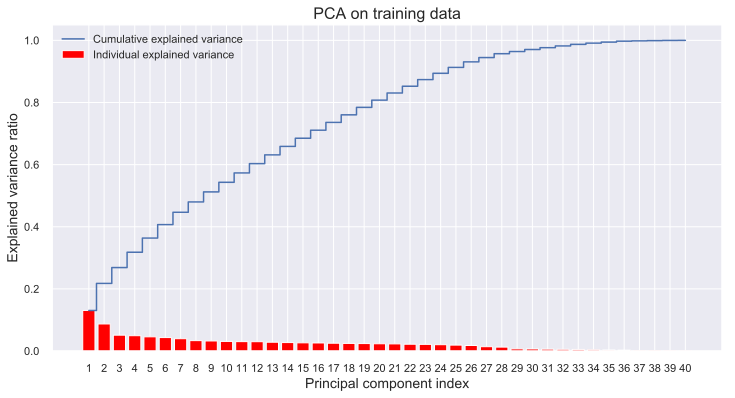

In [37]:
#It’s good to see how many principal components needed to explain 90%, 95% and 99% of the variation in the data.
pca = PCA(n_components=None, svd_solver="full")
pca.fit(StandardScaler().fit_transform(X_train))
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(12, 6))
plt.bar(range(1, 41), pca.explained_variance_ratio_, align="center",
        color='red', label="Individual explained variance")
plt.step(range(1, 41), cum_var_exp, where="mid", label="Cumulative explained variance")
plt.xticks(range(1, 41))
plt.legend(loc="best")
plt.xlabel("Principal component index", {"fontsize": 14})
plt.ylabel("Explained variance ratio", {"fontsize": 14})
plt.title("PCA on training data", {"fontsize": 16});

In [39]:
cum_var_exp

array([0.13051237, 0.21762083, 0.26860827, 0.31796396, 0.36364101,
       0.4069291 , 0.44659395, 0.47990411, 0.51225084, 0.54309738,
       0.57326273, 0.60318111, 0.63145555, 0.65863918, 0.68497198,
       0.71083022, 0.73595007, 0.76034449, 0.784335  , 0.80764666,
       0.83056951, 0.8523994 , 0.87370184, 0.89399821, 0.91297755,
       0.93078701, 0.94464639, 0.9571709 , 0.96406623, 0.97062767,
       0.97656817, 0.98207203, 0.98716175, 0.99112368, 0.99445339,
       0.99743362, 0.99837452, 0.999216  , 0.99976746, 1.        ])

95% of the variance in our data is explained by 25 of our features and 99%  of the variance is explained by 33 of our features

# Feature Selection Utilizing Various Model Types

### Feature Selection Utilizing 80% Threshold

In [41]:
ibm_df_feateng_threshold_80_percent = ibm_df.copy(deep=True)

def variance_threshold_selector(data, threshold = 0.8):
    sel = VarianceThreshold(threshold)
    sel.fit(data)
    return data[data.columns[sel.get_support(indices=True)]]    

ibm_df_threshold_feature = variance_threshold_selector(ibm_df_feateng_threshold_80_percent,0.8)

ibm_df_threshold_feature.columns

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction',
       'TrainingTimesLastYear', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [43]:
#Save Feature Engineerd DataFrame
with open('./data/feat_eng/ibm_df_feateng_threshold_80_percent.pickle', 'wb') as f:
    pickle.dump(ibm_df_feateng_threshold_80_percent,f)

### Feature Selection Utilizing L1 Regualrization

In [65]:
X = X_resampled_down
y = y_resampled_down

In [55]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(ibm_df.loc[:, ibm_df.columns != "Attrition"])
X_new.shape

from itertools import chain
zeros = list(chain.from_iterable(lsvc.coef_))


columns_index_removed = [i for i, e in enumerate(zeros) if e == 0]

print('Removed Columns Per L1 Regularization: ', ', '.join(ibm_df.columns[columns_index_removed]))

print('\n')

columns_index_remaining = [i for i, e in enumerate(zeros) if e != 0]

print('Remaining Columns per L1 Regularization: ', ', '.join(ibm_df.columns[columns_index_remaining]))

ibm_df_featend_l1 = ibm_df[ibm_df.columns[columns_index_remaining]]

Removed Columns Per L1 Regularization:  JobInvolvement, OverTime, TrainingTimesLastYear, WorkLifeBalance, BusinessTravel_Travel_Frequently, Department_Sales, EducationField_Life Sciences, EducationField_Marketing, EducationField_Medical, Gender_Male, JobRole_Laboratory Technician, JobRole_Manager, JobRole_Manufacturing Director, JobRole_Research Director, JobRole_Research Scientist, JobRole_Sales Executive, JobRole_Sales Representative


Remaining Columns per L1 Regularization:  Age, Attrition, DistanceFromHome, EnvironmentSatisfaction, JobLevel, JobSatisfaction, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, BusinessTravel_Travel_Rarely, Department_Research & Development, EducationField_Other, EducationField_Technical Degree, JobRole_Human Resources, MaritalStatus_Married


### Regular Training Data
Removed Columns Per L1 Regularization:  JobInvolvement, OverTime, PercentSalaryHike, PerformanceRating, StockOptionLevel, TrainingTimesLastYear, WorkLifeBalance, YearsWithCurrManager, BusinessTravel_Travel_Frequently, BusinessTravel_Travel_Rarely, Department_Research & Development, Department_Sales, EducationField_Life Sciences, EducationField_Marketing, EducationField_Medical, EducationField_Other, EducationField_Technical Degree, Gender_Male, JobRole_Human Resources, JobRole_Laboratory Technician, JobRole_Manager, JobRole_Manufacturing Director, JobRole_Research Director, JobRole_Research Scientist, JobRole_Sales Executive, JobRole_Sales Representative, MaritalStatus_Married


Remaining Columns per L1 Regularization:  Age, Attrition, DistanceFromHome, EnvironmentSatisfaction, JobLevel, JobSatisfaction, MonthlyIncome, NumCompaniesWorked, RelationshipSatisfaction, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion

### Upsampled Data
Removed Columns Per L1 Regularization:  JobInvolvement, OverTime, TrainingTimesLastYear, WorkLifeBalance, BusinessTravel_Travel_Frequently, Department_Sales, EducationField_Life Sciences, EducationField_Marketing, EducationField_Medical, Gender_Male, JobRole_Laboratory Technician, JobRole_Manager, JobRole_Manufacturing Director, JobRole_Research Director, JobRole_Research Scientist, JobRole_Sales Executive, JobRole_Sales Representative


Remaining Columns per L1 Regularization:  Age, Attrition, DistanceFromHome, EnvironmentSatisfaction, JobLevel, JobSatisfaction, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, BusinessTravel_Travel_Rarely, Department_Research & Development, EducationField_Other, EducationField_Technical Degree, JobRole_Human Resources, MaritalStatus_Married

### DownSampled Data
Removed Columns Per L1 Regularization:  DistanceFromHome, EnvironmentSatisfaction, JobInvolvement, JobLevel, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsWithCurrManager, BusinessTravel_Travel_Frequently, BusinessTravel_Travel_Rarely, Department_Research & Development, Department_Sales, EducationField_Life Sciences, EducationField_Marketing, EducationField_Medical, EducationField_Other, EducationField_Technical Degree, Gender_Male, JobRole_Human Resources, JobRole_Laboratory Technician, JobRole_Manager, JobRole_Manufacturing Director, JobRole_Research Director, JobRole_Research Scientist, JobRole_Sales Executive, JobRole_Sales Representative, MaritalStatus_Married


Remaining Columns per L1 Regularization:  Age, Attrition, JobSatisfaction, MonthlyIncome, OverTime, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion


In [56]:
#Save Feature Engineerd Model
with open('./data/feat_eng/ibm_df_featend_l1_up.pickle', 'wb') as f:
    pickle.dump(ibm_df_featend_l1,f)

### Feature Selection Utilizing L2 Regualrization

In [66]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(ibm_df.loc[:, ibm_df.columns != "Attrition"])
X_new.shape

from itertools import chain
zeros = list(chain.from_iterable(lsvc.coef_))


columns_index_removed = [i for i, e in enumerate(zeros) if e == 0]

print('Removed Columns Per L2 Regularization: ', ', '.join(ibm_df.columns[columns_index_removed]))

print('\n')

columns_index_remaining = [i for i, e in enumerate(zeros) if e != 0]

print('Remaining Columns per L2 Regularization: ', ', '.join(ibm_df.columns[columns_index_remaining]))

ibm_df_featend_l2 = ibm_df[ibm_df.columns[columns_index_remaining]]

Removed Columns Per L2 Regularization:  DistanceFromHome, EnvironmentSatisfaction, JobInvolvement, JobLevel, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsWithCurrManager, BusinessTravel_Travel_Frequently, BusinessTravel_Travel_Rarely, Department_Research & Development, Department_Sales, EducationField_Life Sciences, EducationField_Marketing, EducationField_Medical, EducationField_Other, EducationField_Technical Degree, Gender_Male, JobRole_Human Resources, JobRole_Laboratory Technician, JobRole_Manager, JobRole_Manufacturing Director, JobRole_Research Director, JobRole_Research Scientist, JobRole_Sales Executive, JobRole_Sales Representative, MaritalStatus_Married


Remaining Columns per L2 Regularization:  Age, Attrition, JobSatisfaction, MonthlyIncome, OverTime, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion


### Regular Training Data
Removed Columns Per L2 Regularization:  JobInvolvement, OverTime, PercentSalaryHike, PerformanceRating, StockOptionLevel, TrainingTimesLastYear, WorkLifeBalance, YearsWithCurrManager, BusinessTravel_Travel_Frequently, BusinessTravel_Travel_Rarely, Department_Research & Development, Department_Sales, EducationField_Life Sciences, EducationField_Marketing, EducationField_Medical, EducationField_Other, EducationField_Technical Degree, Gender_Male, JobRole_Human Resources, JobRole_Laboratory Technician, JobRole_Manager, JobRole_Manufacturing Director, JobRole_Research Director, JobRole_Research Scientist, JobRole_Sales Executive, JobRole_Sales Representative, MaritalStatus_Married


Remaining Columns per L2 Regularization:  Age, Attrition, DistanceFromHome, EnvironmentSatisfaction, JobLevel, JobSatisfaction, MonthlyIncome, NumCompaniesWorked, RelationshipSatisfaction, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion


### Upsampled Data
Removed Columns Per L2 Regularization:  JobInvolvement, OverTime, TrainingTimesLastYear, WorkLifeBalance, BusinessTravel_Travel_Frequently, Department_Sales, EducationField_Life Sciences, EducationField_Marketing, EducationField_Medical, Gender_Male, JobRole_Laboratory Technician, JobRole_Manager, JobRole_Manufacturing Director, JobRole_Research Director, JobRole_Research Scientist, JobRole_Sales Executive, JobRole_Sales Representative


Remaining Columns per L2 Regularization:  Age, Attrition, DistanceFromHome, EnvironmentSatisfaction, JobLevel, JobSatisfaction, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, BusinessTravel_Travel_Rarely, Department_Research & Development, EducationField_Other, EducationField_Technical Degree, JobRole_Human Resources, MaritalStatus_Married


### DownSampled Data
Removed Columns Per L2 Regularization:  DistanceFromHome, EnvironmentSatisfaction, JobInvolvement, JobLevel, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsWithCurrManager, BusinessTravel_Travel_Frequently, BusinessTravel_Travel_Rarely, Department_Research & Development, Department_Sales, EducationField_Life Sciences, EducationField_Marketing, EducationField_Medical, EducationField_Other, EducationField_Technical Degree, Gender_Male, JobRole_Human Resources, JobRole_Laboratory Technician, JobRole_Manager, JobRole_Manufacturing Director, JobRole_Research Director, JobRole_Research Scientist, JobRole_Sales Executive, JobRole_Sales Representative, MaritalStatus_Married


Remaining Columns per L2 Regularization:  Age, Attrition, JobSatisfaction, MonthlyIncome, OverTime, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion


In [67]:
#Save Feature Engineerd DataFrame
with open('./data/feat_eng/ibm_df_featend_l2_down.pickle', 'wb') as f:
    pickle.dump(ibm_df_featend_l2,f)

Feature ranking:
1. feature 8 (0.055608)
2. feature 13 (0.044963)
3. feature 6 (0.040839)
4. feature 1 (0.040143)
5. feature 2 (0.039882)
6. feature 16 (0.039406)
7. feature 0 (0.039170)
8. feature 5 (0.037732)
9. feature 7 (0.037561)
10. feature 15 (0.036955)
11. feature 3 (0.035793)
12. feature 11 (0.035025)
13. feature 18 (0.033265)
14. feature 9 (0.033011)
15. feature 17 (0.032609)
16. feature 14 (0.032012)
17. feature 19 (0.031790)
18. feature 12 (0.031593)
19. feature 4 (0.031559)
20. feature 39 (0.031224)
21. feature 29 (0.022899)
22. feature 20 (0.022335)
23. feature 31 (0.018799)
24. feature 24 (0.017842)
25. feature 26 (0.017353)
26. feature 28 (0.016318)
27. feature 38 (0.016141)
28. feature 21 (0.016094)
29. feature 10 (0.015189)
30. feature 35 (0.013684)
31. feature 22 (0.012931)
32. feature 37 (0.011146)
33. feature 23 (0.011035)
34. feature 25 (0.009914)
35. feature 36 (0.009901)
36. feature 30 (0.008395)
37. feature 27 (0.007619)
38. feature 33 (0.006155)
39. feature 32

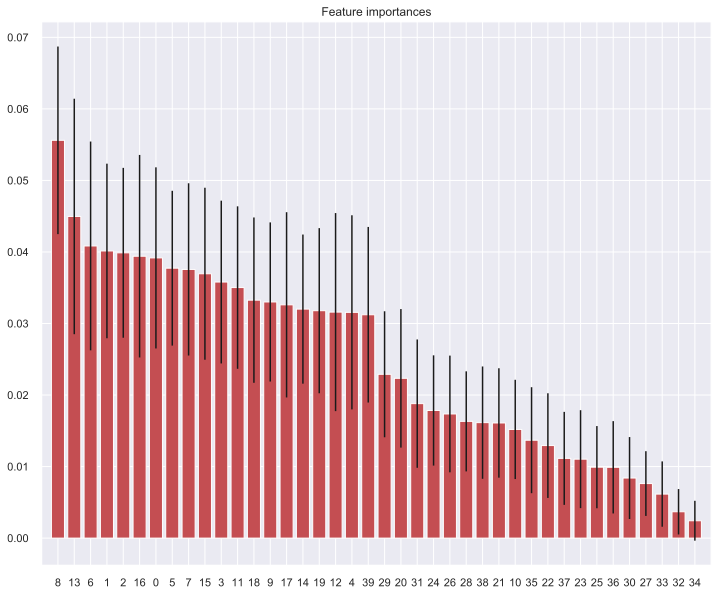

In [73]:
X = X_train
y = y_train

# Build a forest and compute the feature importances
#Great for final models
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(12,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()